# Bank Customer Churn Prediction

# ----------------------------------

## Objective

The objective of this project is to build a machine learning model that can predict customer churn in the banking industry. 
By identifying customers who are more likely to churn, the model can support proactive retention strategies and help banks 
prioritize high-risk customers for targeted interventions.

The project focuses on maximizing the model's ability to correctly identify churn customers while maintaining a reasonable 
trade-off between recall and precision.

## Dataset

The dataset consists of 10,000 bank customers with both demographic and financial attributes. 
The target variable `churn` indicates whether a customer has exited the bank (1) or not (0).

### Dataset Overview
- Total records: 10,000
- Target variable: `churn`
- Numerical features: credit_score, age, tenure, balance, products_number, estimated_salary
- Categorical features: gender, country
- Data types: 8 integer, 2 float, 2 categorical columns
- The dataset exhibits class imbalance, where non-churn customers significantly outnumber churn customers.

### Target Distribution
The imbalance in the target variable motivates the use of class weighting and evaluation metrics such as ROC-AUC and recall 
to ensure effective churn detection.

## Library

In [2]:
# Library

!pip install pandas matplotlib seaborn scikit-learn xgboost optuna shap numpy==2.3

## 1. Load Data

In [ ]:
import pandas as pd

df = pd.read_csv('data/Bank Customer Churn Prediction.csv')
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## 2.Data Cleaning

### 2.1 Missing Value

In [4]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

### 2.2 Duplicate

In [5]:
df.duplicated().sum()

np.int64(0)

### 2.3 Outlier

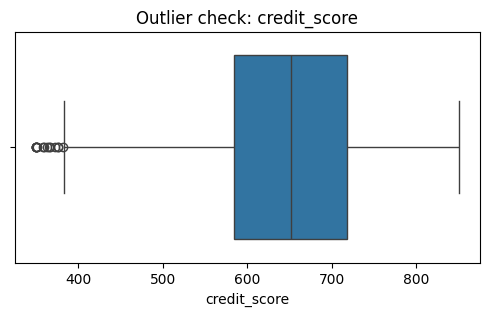

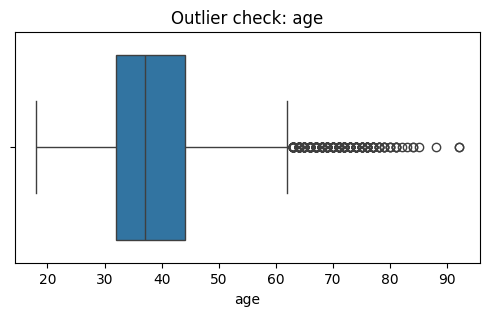

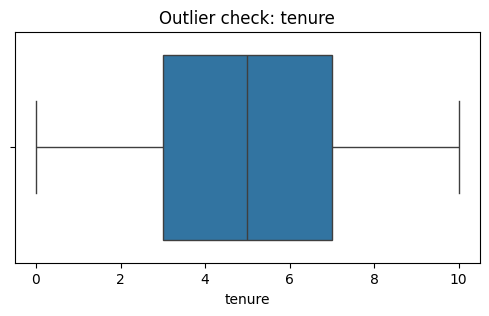

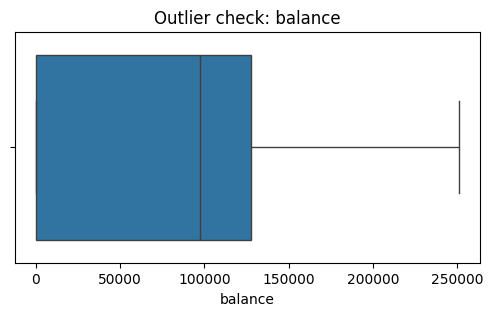

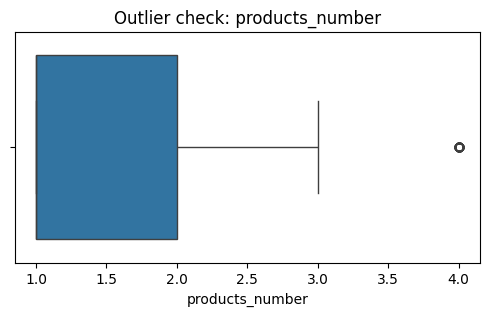

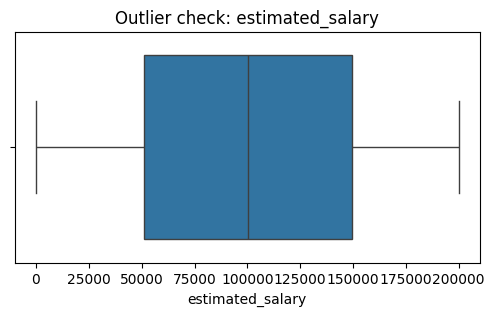

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['credit_score','age','tenure','balance','products_number','estimated_salary']

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier check: {col}")
    plt.show()

## 3. Exploratory Data Analysis (EDA)

### 3.1 Dataset Summary

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [8]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### 3.2 Churn Pattern vs Key Features

<Axes: xlabel='churn', ylabel='tenure'>

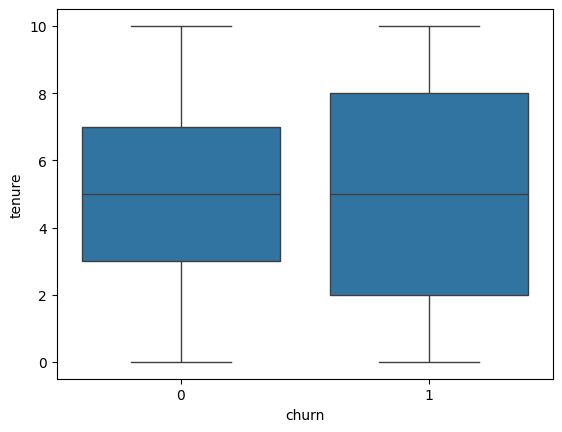

In [9]:
sns.boxplot(data=df, x='churn', y='tenure')

<Axes: xlabel='products_number', ylabel='count'>

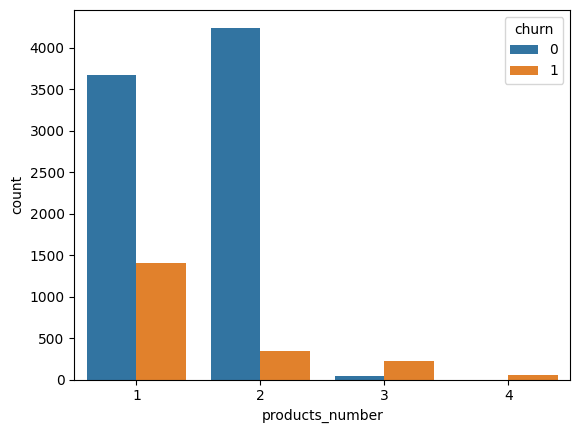

In [10]:
sns.countplot(data=df, x='products_number', hue='churn')

<Axes: xlabel='active_member', ylabel='count'>

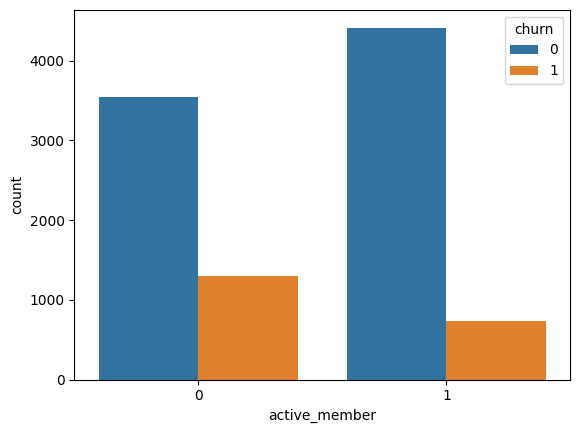

In [11]:
sns.countplot(data=df, x='active_member', hue='churn')

<Axes: xlabel='churn', ylabel='credit_score'>

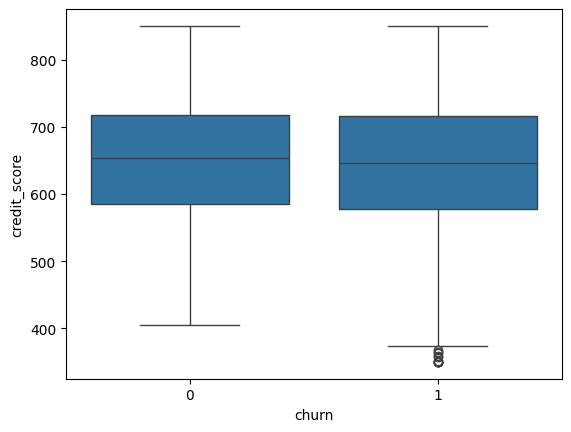

In [12]:
sns.boxplot(data=df, x='churn', y='credit_score')

<Axes: xlabel='churn', ylabel='age'>

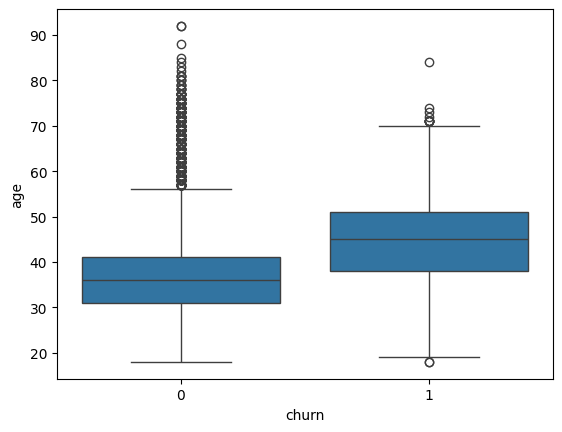

In [13]:
sns.boxplot(data=df, x="churn", y="age")

<Axes: xlabel='churn', ylabel='balance'>

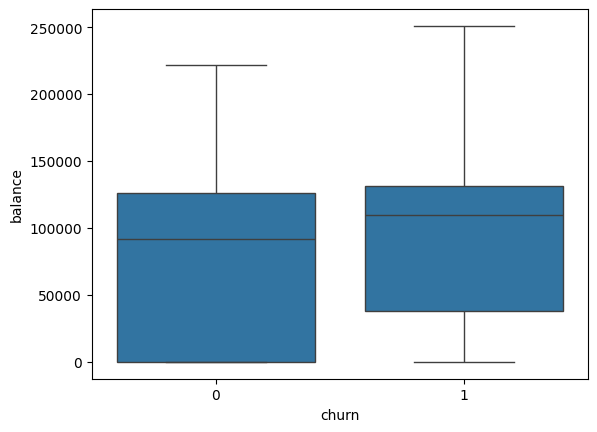

In [14]:
sns.boxplot(data=df, x="churn", y="balance")

### 3.3 Correlation

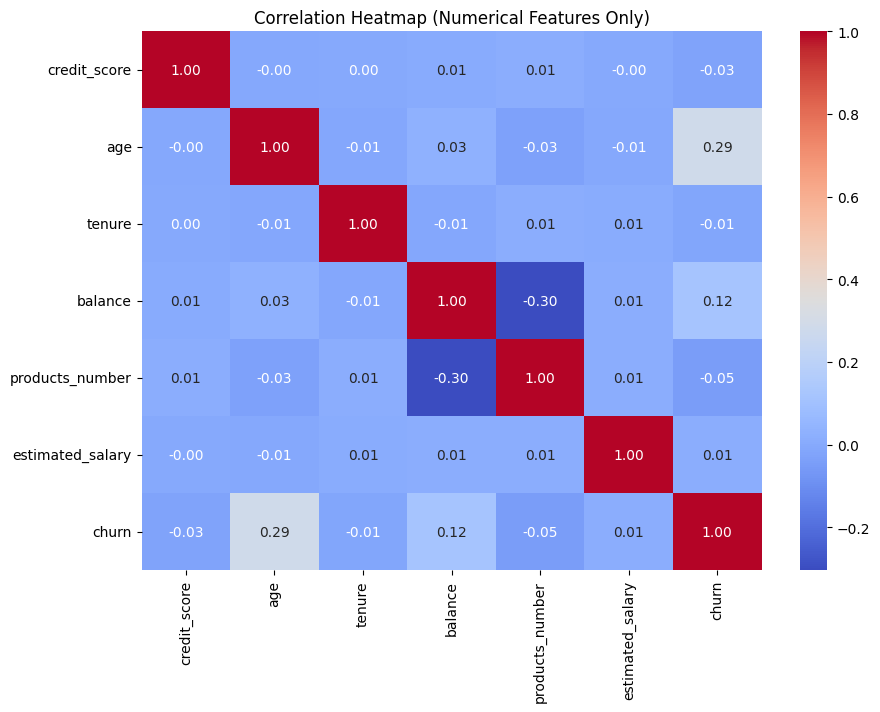

In [15]:
numerical_cols = ['credit_score','age','tenure','balance','products_number','estimated_salary','churn']

plt.figure(figsize=(10,7))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features Only)")
plt.show()

### 3.4 Class Imbalance

In [16]:
df['churn'].value_counts(normalize=True)

churn
0    0.7963
1    0.2037
Name: proportion, dtype: float64

<Axes: xlabel='churn', ylabel='count'>

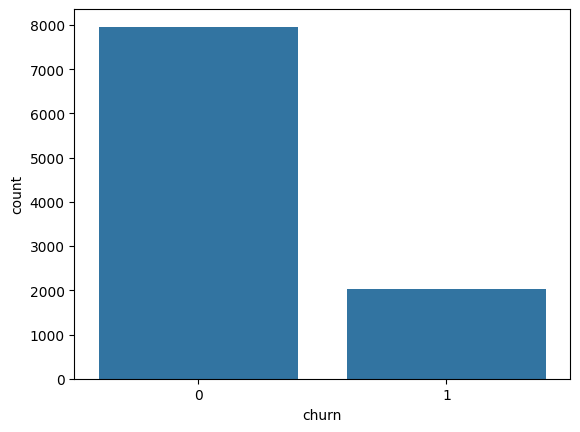

In [17]:
sns.countplot(data=df, x='churn')

## 4.Data Preprocessing

### 4.1 Split Features and Target

In [18]:
df = df.copy()

In [19]:
X = df.drop(columns=['churn'])
y = df['churn']

### 4.2 Split Data Train & Test

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop('churn', axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

### 4.3 Categorical Encoding

In [21]:
# encode gender (binary)
X_train['gender'] = X_train['gender'].map({'Male': 1, 'Female': 0})
X_test['gender']  = X_test['gender'].map({'Male': 1, 'Female': 0})

# one-hot country
X_train = pd.get_dummies(X_train, columns=['country'], drop_first=True)
X_test  = pd.get_dummies(X_test, columns=['country'], drop_first=True)

# samakan kolom train & test
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# 5. Modeling

### 5.1 Handling Class Imbalance

In [22]:
from xgboost import XGBClassifier

neg = y_train.value_counts()[0]
pos = y_train.value_counts()[1]

scale = neg / pos
scale

np.float64(3.9079754601226995)

### 5.2 XGBoost Baseline

In [23]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=float(scale),
    objective="binary:logistic",
    eval_metric="auc",
    random_state=42
)

xgb.fit(X_train, y_train)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes f

In [24]:
y_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)[:, 1]

In [25]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix
)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_proba))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy : 0.818
Precision: 0.5403377110694184
Recall   : 0.7076167076167076
F1-score : 0.6127659574468085
ROC-AUC  : 0.8547067869101768

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      1593
           1       0.54      0.71      0.61       407

    accuracy                           0.82      2000
   macro avg       0.73      0.78      0.75      2000
weighted avg       0.84      0.82      0.83      2000



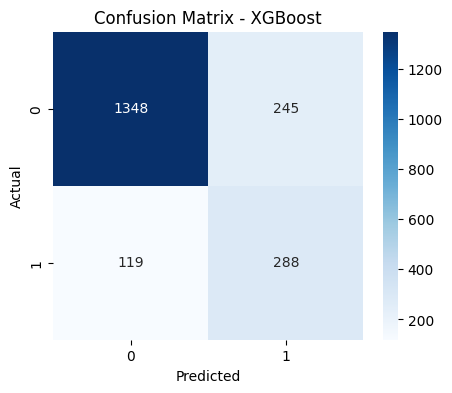

In [26]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()


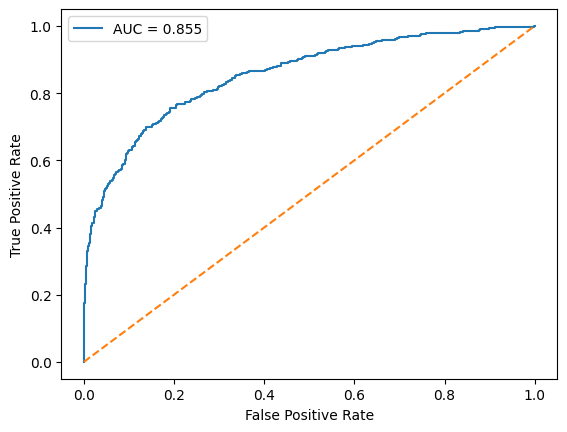

In [27]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


### 5.3 Hyperparamter Tuning (Optuna)

In [28]:
import optuna
import numpy as np

from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

def objective(trial):

    params = {
        "n_estimators": trial.suggest_int("n_estimators", 200, 600),
        "max_depth": trial.suggest_int("max_depth", 3, 8),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "scale_pos_weight": float(scale),   # FIXED (PENTING)
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "random_state": 42,
        "tree_method": "hist"
    }

    model = XGBClassifier(**params)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    auc = cross_val_score(
        model,
        X_train,
        y_train,
        scoring="roc_auc",
        cv=cv,
        n_jobs=-1
    ).mean()

    return auc

In [29]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, show_progress_bar=True)

print("Best ROC-AUC:", study.best_value)
print("Best parameters:")
for k, v in study.best_params.items():
    print(f"{k}: {v}")


[I 2025-12-23 18:32:47,100] A new study created in memory with name: no-name-bf8b541b-7c83-4e24-b3d6-4825c5298e82
Best trial: 0. Best value: 0.862349:   2%|▏         | 1/50 [00:02<02:26,  2.98s/it]

[I 2025-12-23 18:32:50,082] Trial 0 finished with value: 0.8623493946894474 and parameters: {'n_estimators': 554, 'max_depth': 6, 'learning_rate': 0.07453432246188052, 'subsample': 0.8638489025376463, 'colsample_bytree': 0.847233792235618, 'min_child_weight': 3, 'gamma': 4.118305045424584}. Best is trial 0 with value: 0.8623493946894474.


Best trial: 0. Best value: 0.862349:   4%|▍         | 2/50 [00:05<01:57,  2.44s/it]

[I 2025-12-23 18:32:52,142] Trial 1 finished with value: 0.8499186177538499 and parameters: {'n_estimators': 595, 'max_depth': 8, 'learning_rate': 0.12190018720768626, 'subsample': 0.8549351896068678, 'colsample_bytree': 0.8222935984084371, 'min_child_weight': 1, 'gamma': 1.405321568274072}. Best is trial 0 with value: 0.8623493946894474.


Best trial: 0. Best value: 0.862349:   6%|▌         | 3/50 [00:06<01:32,  1.98s/it]

[I 2025-12-23 18:32:53,569] Trial 2 finished with value: 0.8544505012953743 and parameters: {'n_estimators': 412, 'max_depth': 6, 'learning_rate': 0.18302962003427908, 'subsample': 0.8810943339875712, 'colsample_bytree': 0.6826607416248576, 'min_child_weight': 9, 'gamma': 2.6716516105475296}. Best is trial 0 with value: 0.8623493946894474.


Best trial: 0. Best value: 0.862349:   8%|▊         | 4/50 [00:06<01:04,  1.41s/it]

[I 2025-12-23 18:32:54,100] Trial 3 finished with value: 0.8611980044495382 and parameters: {'n_estimators': 260, 'max_depth': 7, 'learning_rate': 0.03774960004736102, 'subsample': 0.6759500285829757, 'colsample_bytree': 0.8188079300312318, 'min_child_weight': 10, 'gamma': 0.41389412264208947}. Best is trial 0 with value: 0.8623493946894474.


Best trial: 4. Best value: 0.863237:  10%|█         | 5/50 [00:07<00:45,  1.00s/it]

[I 2025-12-23 18:32:54,382] Trial 4 finished with value: 0.8632373761208119 and parameters: {'n_estimators': 254, 'max_depth': 6, 'learning_rate': 0.05452765365614907, 'subsample': 0.7223970743015847, 'colsample_bytree': 0.6541053065838467, 'min_child_weight': 5, 'gamma': 4.635559400527581}. Best is trial 4 with value: 0.8632373761208119.


Best trial: 4. Best value: 0.863237:  12%|█▏        | 6/50 [00:07<00:35,  1.25it/s]

[I 2025-12-23 18:32:54,798] Trial 5 finished with value: 0.844500678987971 and parameters: {'n_estimators': 469, 'max_depth': 7, 'learning_rate': 0.1630697984725336, 'subsample': 0.7897812587842348, 'colsample_bytree': 0.8497813331421744, 'min_child_weight': 9, 'gamma': 2.219491487430888}. Best is trial 4 with value: 0.8632373761208119.


Best trial: 6. Best value: 0.865569:  14%|█▍        | 7/50 [00:08<00:27,  1.54it/s]

[I 2025-12-23 18:32:55,130] Trial 6 finished with value: 0.865569049705772 and parameters: {'n_estimators': 289, 'max_depth': 5, 'learning_rate': 0.028726156751560417, 'subsample': 0.7854133562142187, 'colsample_bytree': 0.7728367788321235, 'min_child_weight': 5, 'gamma': 2.6446830485236332}. Best is trial 6 with value: 0.865569049705772.


Best trial: 6. Best value: 0.865569:  16%|█▌        | 8/50 [00:08<00:23,  1.78it/s]

[I 2025-12-23 18:32:55,504] Trial 7 finished with value: 0.8602845007752984 and parameters: {'n_estimators': 546, 'max_depth': 6, 'learning_rate': 0.07928980831656146, 'subsample': 0.9223360533411666, 'colsample_bytree': 0.8603115248373514, 'min_child_weight': 2, 'gamma': 3.405038162080735}. Best is trial 6 with value: 0.865569049705772.


Best trial: 6. Best value: 0.865569:  18%|█▊        | 9/50 [00:08<00:18,  2.21it/s]

[I 2025-12-23 18:32:55,718] Trial 8 finished with value: 0.8641634001406132 and parameters: {'n_estimators': 315, 'max_depth': 6, 'learning_rate': 0.10589161471599999, 'subsample': 0.9433000607158275, 'colsample_bytree': 0.6479661077119409, 'min_child_weight': 5, 'gamma': 4.30350033087512}. Best is trial 6 with value: 0.865569049705772.


Best trial: 6. Best value: 0.865569:  20%|██        | 10/50 [00:08<00:15,  2.52it/s]

[I 2025-12-23 18:32:55,992] Trial 9 finished with value: 0.864298234631276 and parameters: {'n_estimators': 251, 'max_depth': 4, 'learning_rate': 0.04183852834994912, 'subsample': 0.6616639402106061, 'colsample_bytree': 0.8553556989006179, 'min_child_weight': 9, 'gamma': 3.5379565152667922}. Best is trial 6 with value: 0.865569049705772.


Best trial: 6. Best value: 0.865569:  22%|██▏       | 11/50 [00:09<00:13,  2.80it/s]

[I 2025-12-23 18:32:56,258] Trial 10 finished with value: 0.8633736552667315 and parameters: {'n_estimators': 354, 'max_depth': 3, 'learning_rate': 0.016149288141216453, 'subsample': 0.6039719784398805, 'colsample_bytree': 0.9614711738372556, 'min_child_weight': 7, 'gamma': 1.54343782776911}. Best is trial 6 with value: 0.865569049705772.


Best trial: 6. Best value: 0.865569:  24%|██▍       | 12/50 [00:09<00:12,  3.05it/s]

[I 2025-12-23 18:32:56,518] Trial 11 finished with value: 0.8647971222467279 and parameters: {'n_estimators': 212, 'max_depth': 4, 'learning_rate': 0.026990270779783346, 'subsample': 0.7481192418996949, 'colsample_bytree': 0.7403819755506693, 'min_child_weight': 7, 'gamma': 3.2904380351452165}. Best is trial 6 with value: 0.865569049705772.


Best trial: 6. Best value: 0.865569:  26%|██▌       | 13/50 [00:09<00:11,  3.28it/s]

[I 2025-12-23 18:32:56,770] Trial 12 finished with value: 0.8642409299727442 and parameters: {'n_estimators': 202, 'max_depth': 4, 'learning_rate': 0.021351868648767276, 'subsample': 0.777528210385594, 'colsample_bytree': 0.7408848270558608, 'min_child_weight': 7, 'gamma': 2.838613779336833}. Best is trial 6 with value: 0.865569049705772.


Best trial: 6. Best value: 0.865569:  28%|██▊       | 14/50 [00:09<00:10,  3.58it/s]

[I 2025-12-23 18:32:56,991] Trial 13 finished with value: 0.8653017884832082 and parameters: {'n_estimators': 201, 'max_depth': 4, 'learning_rate': 0.024932554656572438, 'subsample': 0.7420661270017707, 'colsample_bytree': 0.7320382263967321, 'min_child_weight': 7, 'gamma': 1.8924663438185552}. Best is trial 6 with value: 0.865569049705772.


Best trial: 6. Best value: 0.865569:  30%|███       | 15/50 [00:10<00:09,  3.57it/s]

[I 2025-12-23 18:32:57,273] Trial 14 finished with value: 0.8605142009611771 and parameters: {'n_estimators': 323, 'max_depth': 3, 'learning_rate': 0.011866061431481428, 'subsample': 0.8222806703731258, 'colsample_bytree': 0.7509167710881621, 'min_child_weight': 4, 'gamma': 1.7426295890151153}. Best is trial 6 with value: 0.865569049705772.


Best trial: 6. Best value: 0.865569:  32%|███▏      | 16/50 [00:10<00:10,  3.10it/s]

[I 2025-12-23 18:32:57,695] Trial 15 finished with value: 0.8647663029345762 and parameters: {'n_estimators': 289, 'max_depth': 5, 'learning_rate': 0.02460861534861317, 'subsample': 0.7107004498276165, 'colsample_bytree': 0.9235019861270942, 'min_child_weight': 6, 'gamma': 1.149510996627313}. Best is trial 6 with value: 0.865569049705772.


Best trial: 6. Best value: 0.865569:  34%|███▍      | 17/50 [00:11<00:12,  2.67it/s]

[I 2025-12-23 18:32:58,191] Trial 16 finished with value: 0.8653836522811108 and parameters: {'n_estimators': 375, 'max_depth': 5, 'learning_rate': 0.01274313990069544, 'subsample': 0.979395132200864, 'colsample_bytree': 0.610155321010701, 'min_child_weight': 4, 'gamma': 0.4878489345948127}. Best is trial 6 with value: 0.865569049705772.


Best trial: 6. Best value: 0.865569:  36%|███▌      | 18/50 [00:11<00:13,  2.38it/s]

[I 2025-12-23 18:32:58,715] Trial 17 finished with value: 0.864453294295538 and parameters: {'n_estimators': 410, 'max_depth': 5, 'learning_rate': 0.010490582182060946, 'subsample': 0.9971565533958495, 'colsample_bytree': 0.6028939715151064, 'min_child_weight': 3, 'gamma': 0.23426390037012135}. Best is trial 6 with value: 0.865569049705772.


Best trial: 6. Best value: 0.865569:  38%|███▊      | 19/50 [00:12<00:13,  2.34it/s]

[I 2025-12-23 18:32:59,159] Trial 18 finished with value: 0.8650123758800359 and parameters: {'n_estimators': 365, 'max_depth': 5, 'learning_rate': 0.01469595687219071, 'subsample': 0.9984477087983752, 'colsample_bytree': 0.601985761735271, 'min_child_weight': 4, 'gamma': 0.8654734937357592}. Best is trial 6 with value: 0.865569049705772.


Best trial: 6. Best value: 0.865569:  40%|████      | 20/50 [00:12<00:13,  2.16it/s]

[I 2025-12-23 18:32:59,704] Trial 19 finished with value: 0.864251042559544 and parameters: {'n_estimators': 451, 'max_depth': 5, 'learning_rate': 0.017341319949942636, 'subsample': 0.9307967579639653, 'colsample_bytree': 0.7884482854355532, 'min_child_weight': 1, 'gamma': 0.00041921907455910734}. Best is trial 6 with value: 0.865569049705772.


Best trial: 6. Best value: 0.865569:  42%|████▏     | 21/50 [00:13<00:14,  1.98it/s]

[I 2025-12-23 18:33:00,310] Trial 20 finished with value: 0.8603374714680587 and parameters: {'n_estimators': 365, 'max_depth': 7, 'learning_rate': 0.03308873620734822, 'subsample': 0.8258946545917081, 'colsample_bytree': 0.9068180790543082, 'min_child_weight': 4, 'gamma': 2.225354099001268}. Best is trial 6 with value: 0.865569049705772.


Best trial: 21. Best value: 0.865602:  44%|████▍     | 22/50 [00:13<00:12,  2.25it/s]

[I 2025-12-23 18:33:00,614] Trial 21 finished with value: 0.8656022767766851 and parameters: {'n_estimators': 294, 'max_depth': 4, 'learning_rate': 0.029194160685311138, 'subsample': 0.7661648260206547, 'colsample_bytree': 0.7088818259403573, 'min_child_weight': 6, 'gamma': 0.8655098221591953}. Best is trial 21 with value: 0.8656022767766851.


Best trial: 21. Best value: 0.865602:  46%|████▌     | 23/50 [00:13<00:10,  2.50it/s]

[I 2025-12-23 18:33:00,908] Trial 22 finished with value: 0.8637487840818252 and parameters: {'n_estimators': 305, 'max_depth': 4, 'learning_rate': 0.051720764764300535, 'subsample': 0.7756126894525819, 'colsample_bytree': 0.6952287618633481, 'min_child_weight': 6, 'gamma': 0.7302573768248732}. Best is trial 21 with value: 0.8656022767766851.


Best trial: 21. Best value: 0.865602:  48%|████▊     | 24/50 [00:14<00:09,  2.72it/s]

[I 2025-12-23 18:33:01,200] Trial 23 finished with value: 0.8653725765908062 and parameters: {'n_estimators': 337, 'max_depth': 3, 'learning_rate': 0.0320566830977423, 'subsample': 0.8198048678400638, 'colsample_bytree': 0.6978658356648338, 'min_child_weight': 5, 'gamma': 0.8574408372335656}. Best is trial 21 with value: 0.8656022767766851.


Best trial: 21. Best value: 0.865602:  50%|█████     | 25/50 [00:14<00:09,  2.60it/s]

[I 2025-12-23 18:33:01,624] Trial 24 finished with value: 0.865365834866273 and parameters: {'n_estimators': 390, 'max_depth': 5, 'learning_rate': 0.019426444787908143, 'subsample': 0.8935158560831401, 'colsample_bytree': 0.7773668642745509, 'min_child_weight': 3, 'gamma': 3.0005450922419077}. Best is trial 21 with value: 0.8656022767766851.


Best trial: 21. Best value: 0.865602:  52%|█████▏    | 26/50 [00:14<00:09,  2.66it/s]

[I 2025-12-23 18:33:01,981] Trial 25 finished with value: 0.8639488688349337 and parameters: {'n_estimators': 279, 'max_depth': 4, 'learning_rate': 0.013541302180678836, 'subsample': 0.6880045202770171, 'colsample_bytree': 0.6360543751497831, 'min_child_weight': 6, 'gamma': 2.330601334708456}. Best is trial 21 with value: 0.8656022767766851.


Best trial: 21. Best value: 0.865602:  54%|█████▍    | 27/50 [00:15<00:10,  2.28it/s]

[I 2025-12-23 18:33:02,564] Trial 26 finished with value: 0.8533193362290646 and parameters: {'n_estimators': 457, 'max_depth': 5, 'learning_rate': 0.06378858818170287, 'subsample': 0.635712407005747, 'colsample_bytree': 0.7704323262152863, 'min_child_weight': 8, 'gamma': 0.5192850895503462}. Best is trial 21 with value: 0.8656022767766851.


Best trial: 27. Best value: 0.86569:  56%|█████▌    | 28/50 [00:15<00:08,  2.51it/s] 

[I 2025-12-23 18:33:02,868] Trial 27 finished with value: 0.865689919195616 and parameters: {'n_estimators': 381, 'max_depth': 3, 'learning_rate': 0.03095860588166148, 'subsample': 0.7502612614822833, 'colsample_bytree': 0.7136042259915407, 'min_child_weight': 4, 'gamma': 1.167705467108409}. Best is trial 27 with value: 0.865689919195616.


Best trial: 28. Best value: 0.865701:  58%|█████▊    | 29/50 [00:16<00:07,  2.73it/s]

[I 2025-12-23 18:33:03,162] Trial 28 finished with value: 0.8657005133341681 and parameters: {'n_estimators': 431, 'max_depth': 3, 'learning_rate': 0.031822957406685094, 'subsample': 0.7629134984211384, 'colsample_bytree': 0.717020999113669, 'min_child_weight': 5, 'gamma': 1.2341682386346322}. Best is trial 28 with value: 0.8657005133341681.


Best trial: 28. Best value: 0.865701:  60%|██████    | 30/50 [00:16<00:07,  2.67it/s]

[I 2025-12-23 18:33:03,557] Trial 29 finished with value: 0.8637483025300728 and parameters: {'n_estimators': 516, 'max_depth': 3, 'learning_rate': 0.048051541577650785, 'subsample': 0.7453174422681056, 'colsample_bytree': 0.7188614262081572, 'min_child_weight': 3, 'gamma': 1.1443362695204238}. Best is trial 28 with value: 0.8657005133341681.


Best trial: 28. Best value: 0.865701:  62%|██████▏   | 31/50 [00:16<00:06,  2.78it/s]

[I 2025-12-23 18:33:03,880] Trial 30 finished with value: 0.8649695177740752 and parameters: {'n_estimators': 434, 'max_depth': 3, 'learning_rate': 0.0366110202283077, 'subsample': 0.7207623046323849, 'colsample_bytree': 0.6800318621493773, 'min_child_weight': 2, 'gamma': 1.9294047048671836}. Best is trial 28 with value: 0.8657005133341681.


Best trial: 28. Best value: 0.865701:  64%|██████▍   | 32/50 [00:17<00:06,  2.81it/s]

[I 2025-12-23 18:33:04,226] Trial 31 finished with value: 0.8656383931581126 and parameters: {'n_estimators': 517, 'max_depth': 3, 'learning_rate': 0.026767205085895623, 'subsample': 0.7663173364718049, 'colsample_bytree': 0.7076595380559011, 'min_child_weight': 5, 'gamma': 1.2341252643410967}. Best is trial 28 with value: 0.8657005133341681.


Best trial: 28. Best value: 0.865701:  66%|██████▌   | 33/50 [00:17<00:05,  2.87it/s]

[I 2025-12-23 18:33:04,558] Trial 32 finished with value: 0.8655305255655825 and parameters: {'n_estimators': 487, 'max_depth': 3, 'learning_rate': 0.021307085164922045, 'subsample': 0.761834203395445, 'colsample_bytree': 0.7113383679328117, 'min_child_weight': 6, 'gamma': 1.304341356182722}. Best is trial 28 with value: 0.8657005133341681.


Best trial: 28. Best value: 0.865701:  68%|██████▊   | 34/50 [00:17<00:05,  2.76it/s]

[I 2025-12-23 18:33:04,954] Trial 33 finished with value: 0.8646179849948474 and parameters: {'n_estimators': 582, 'max_depth': 3, 'learning_rate': 0.04154644893527904, 'subsample': 0.8608582821521669, 'colsample_bytree': 0.6721881091420986, 'min_child_weight': 5, 'gamma': 1.5781188052422819}. Best is trial 28 with value: 0.8657005133341681.


Best trial: 34. Best value: 0.865712:  70%|███████   | 35/50 [00:18<00:05,  2.70it/s]

[I 2025-12-23 18:33:05,341] Trial 34 finished with value: 0.8657115890244725 and parameters: {'n_estimators': 511, 'max_depth': 3, 'learning_rate': 0.03202903859115176, 'subsample': 0.8079173004639781, 'colsample_bytree': 0.8143377911487107, 'min_child_weight': 4, 'gamma': 1.0148370042636872}. Best is trial 34 with value: 0.8657115890244725.


Best trial: 34. Best value: 0.865712:  72%|███████▏  | 36/50 [00:18<00:05,  2.76it/s]

[I 2025-12-23 18:33:05,684] Trial 35 finished with value: 0.8645712744748678 and parameters: {'n_estimators': 528, 'max_depth': 3, 'learning_rate': 0.03607753131450415, 'subsample': 0.8365796938637504, 'colsample_bytree': 0.8157577837140667, 'min_child_weight': 4, 'gamma': 1.0859066247653166}. Best is trial 34 with value: 0.8657115890244725.


Best trial: 34. Best value: 0.865712:  74%|███████▍  | 37/50 [00:18<00:04,  2.75it/s]

[I 2025-12-23 18:33:06,052] Trial 36 finished with value: 0.8617503443095028 and parameters: {'n_estimators': 497, 'max_depth': 3, 'learning_rate': 0.06460175610440388, 'subsample': 0.8004303550914892, 'colsample_bytree': 0.814947303866501, 'min_child_weight': 3, 'gamma': 1.3974682408645174}. Best is trial 34 with value: 0.8657115890244725.


Best trial: 34. Best value: 0.865712:  76%|███████▌  | 38/50 [00:19<00:04,  2.64it/s]

[I 2025-12-23 18:33:06,464] Trial 37 finished with value: 0.8649276227716193 and parameters: {'n_estimators': 571, 'max_depth': 3, 'learning_rate': 0.020963892059134757, 'subsample': 0.7088977682193238, 'colsample_bytree': 0.6617162066962158, 'min_child_weight': 2, 'gamma': 2.053974782597006}. Best is trial 34 with value: 0.8657115890244725.


Best trial: 34. Best value: 0.865712:  78%|███████▊  | 39/50 [00:19<00:04,  2.54it/s]

[I 2025-12-23 18:33:06,896] Trial 38 finished with value: 0.8627408962641214 and parameters: {'n_estimators': 430, 'max_depth': 4, 'learning_rate': 0.04429120047465849, 'subsample': 0.8016435939999006, 'colsample_bytree': 0.8854535618851298, 'min_child_weight': 4, 'gamma': 1.7074527948100084}. Best is trial 34 with value: 0.8657115890244725.


Best trial: 34. Best value: 0.865712:  80%|████████  | 40/50 [00:20<00:05,  1.76it/s]

[I 2025-12-23 18:33:07,868] Trial 39 finished with value: 0.8437465689437644 and parameters: {'n_estimators': 486, 'max_depth': 8, 'learning_rate': 0.08625691837436257, 'subsample': 0.8804777398169773, 'colsample_bytree': 0.752903485918586, 'min_child_weight': 5, 'gamma': 0.23723618906147836}. Best is trial 34 with value: 0.8657115890244725.


Best trial: 40. Best value: 0.865868:  82%|████████▏ | 41/50 [00:21<00:04,  1.87it/s]

[I 2025-12-23 18:33:08,324] Trial 40 finished with value: 0.8658676117922394 and parameters: {'n_estimators': 553, 'max_depth': 3, 'learning_rate': 0.024387779286736255, 'subsample': 0.846969572988553, 'colsample_bytree': 0.7976179987221078, 'min_child_weight': 5, 'gamma': 0.6446750929776035}. Best is trial 40 with value: 0.8658676117922394.


Best trial: 40. Best value: 0.865868:  84%|████████▍ | 42/50 [00:21<00:04,  1.99it/s]

[I 2025-12-23 18:33:08,752] Trial 41 finished with value: 0.8656126301393611 and parameters: {'n_estimators': 550, 'max_depth': 3, 'learning_rate': 0.03050014560293909, 'subsample': 0.8478213391258537, 'colsample_bytree': 0.8346437579137375, 'min_child_weight': 5, 'gamma': 0.557684229001257}. Best is trial 40 with value: 0.8658676117922394.


Best trial: 42. Best value: 0.866134:  86%|████████▌ | 43/50 [00:22<00:03,  2.06it/s]

[I 2025-12-23 18:33:09,198] Trial 42 finished with value: 0.8661341506871743 and parameters: {'n_estimators': 569, 'max_depth': 3, 'learning_rate': 0.025014978363507558, 'subsample': 0.804043157446315, 'colsample_bytree': 0.8038484311455106, 'min_child_weight': 4, 'gamma': 1.0682187480070842}. Best is trial 42 with value: 0.8661341506871743.


Best trial: 43. Best value: 0.866165:  88%|████████▊ | 44/50 [00:22<00:02,  2.10it/s]

[I 2025-12-23 18:33:09,653] Trial 43 finished with value: 0.8661647292234497 and parameters: {'n_estimators': 598, 'max_depth': 3, 'learning_rate': 0.023580174047283773, 'subsample': 0.8057227062809017, 'colsample_bytree': 0.801548671616974, 'min_child_weight': 3, 'gamma': 1.015176287609164}. Best is trial 43 with value: 0.8661647292234497.


Best trial: 44. Best value: 0.866296:  90%|█████████ | 45/50 [00:23<00:02,  1.96it/s]

[I 2025-12-23 18:33:10,240] Trial 44 finished with value: 0.866296192851846 and parameters: {'n_estimators': 592, 'max_depth': 4, 'learning_rate': 0.017435915338260492, 'subsample': 0.8014152095171175, 'colsample_bytree': 0.8005393584784192, 'min_child_weight': 3, 'gamma': 0.7102271217627194}. Best is trial 44 with value: 0.866296192851846.


Best trial: 44. Best value: 0.866296:  92%|█████████▏| 46/50 [00:23<00:02,  1.82it/s]

[I 2025-12-23 18:33:10,881] Trial 45 finished with value: 0.8662398512968188 and parameters: {'n_estimators': 598, 'max_depth': 4, 'learning_rate': 0.016776194315586062, 'subsample': 0.8823786742638015, 'colsample_bytree': 0.7988058224029695, 'min_child_weight': 2, 'gamma': 0.23479921564278394}. Best is trial 44 with value: 0.866296192851846.


Best trial: 44. Best value: 0.866296:  94%|█████████▍| 47/50 [00:24<00:01,  1.73it/s]

[I 2025-12-23 18:33:11,530] Trial 46 finished with value: 0.8657014764376727 and parameters: {'n_estimators': 599, 'max_depth': 4, 'learning_rate': 0.01751982341093359, 'subsample': 0.8977550883147594, 'colsample_bytree': 0.7971894269538214, 'min_child_weight': 1, 'gamma': 0.10194838920715621}. Best is trial 44 with value: 0.866296192851846.


Best trial: 44. Best value: 0.866296:  96%|█████████▌| 48/50 [00:25<00:01,  1.70it/s]

[I 2025-12-23 18:33:12,138] Trial 47 finished with value: 0.8654823703903457 and parameters: {'n_estimators': 569, 'max_depth': 4, 'learning_rate': 0.015183400595669338, 'subsample': 0.8730567139596483, 'colsample_bytree': 0.8367741917298582, 'min_child_weight': 2, 'gamma': 0.6465613536061443}. Best is trial 44 with value: 0.866296192851846.


Best trial: 44. Best value: 0.866296:  98%|█████████▊| 49/50 [00:25<00:00,  1.74it/s]

[I 2025-12-23 18:33:12,677] Trial 48 finished with value: 0.8655950535003996 and parameters: {'n_estimators': 537, 'max_depth': 4, 'learning_rate': 0.023668640033847898, 'subsample': 0.8543894446442324, 'colsample_bytree': 0.8714548997119942, 'min_child_weight': 3, 'gamma': 0.29577216427569614}. Best is trial 44 with value: 0.866296192851846.


Best trial: 44. Best value: 0.866296: 100%|██████████| 50/50 [00:26<00:00,  1.90it/s]

[I 2025-12-23 18:33:13,457] Trial 49 finished with value: 0.8648366094904221 and parameters: {'n_estimators': 582, 'max_depth': 6, 'learning_rate': 0.018139635297018234, 'subsample': 0.8398568320595806, 'colsample_bytree': 0.7648706865365097, 'min_child_weight': 2, 'gamma': 3.9024927282448423}. Best is trial 44 with value: 0.866296192851846.
Best ROC-AUC: 0.866296192851846
Best parameters:
n_estimators: 592
max_depth: 4
learning_rate: 0.017435915338260492
subsample: 0.8014152095171175
colsample_bytree: 0.8005393584784192
min_child_weight: 3
gamma: 0.7102271217627194


In [ ]:
xgb_optuna = XGBClassifier(
    n_estimators=592,
    max_depth=4,
    learning_rate=0.017435915338260492,
    subsample=0.8014152095171175,
    colsample_bytree=0.8005393584784192,
    min_child_weight=3,
    gamma=0.7102271217627194,
    scale_pos_weight=float(scale),
    objective="binary:logistic",
    eval_metric="auc",
    random_state=42
)

xgb_optuna.fit(X_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8005393584784192
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import 

In [38]:
y_proba_opt = xgb_optuna.predict_proba(X_test)[:, 1]
y_pred_opt = (y_proba_opt >= 0.5).astype(int)

from sklearn.metrics import classification_report, roc_auc_score

print("ROC-AUC:", roc_auc_score(y_test, y_proba_opt))
print(classification_report(y_test, y_pred_opt))

ROC-AUC: 0.8670920535327314
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1593
           1       0.51      0.75      0.61       407

    accuracy                           0.80      2000
   macro avg       0.72      0.78      0.74      2000
weighted avg       0.84      0.80      0.82      2000



### 5.4 Threshold Optimization

In [39]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

thresholds = np.arange(0.20, 0.61, 0.05)


results = []

for t in thresholds:
    y_pred_t = (y_proba_opt >= t).astype(int)

    results.append({
        "Threshold": t,
        "Accuracy": accuracy_score(y_test, y_pred_t),
        "Precision": precision_score(y_test, y_pred_t),
        "Recall": recall_score(y_test, y_pred_t),
        "F1-score": f1_score(y_test, y_pred_t)
    })

df_threshold = pd.DataFrame(results)
df_threshold


,Threshold,Accuracy,Precision,Recall,F1-score
0,0.20,0.5455,0.302362,0.943489,0.457961
1,0.25,0.6170,0.337850,0.918919,0.494055
2,0.30,0.6695,0.369342,0.882064,0.520667
3,0.35,0.7110,0.401156,0.852580,0.545597
4,0.40,0.7525,0.442105,0.825553,0.575835
5,0.45,0.7805,0.476471,0.796069,0.596136
6,0.50,0.8035,0.511745,0.749386,0.608175
7,0.55,0.8245,0.554264,0.702703,0.619718
8,0.60,0.8410,0.598234,0.665848,0.630233


In [40]:
FINAL_THRESHOLD = 0.6

y_final = (y_proba_opt >= FINAL_THRESHOLD).astype(int)

print(classification_report(y_test, y_final))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1593
           1       0.60      0.67      0.63       407

    accuracy                           0.84      2000
   macro avg       0.76      0.78      0.76      2000
weighted avg       0.85      0.84      0.84      2000



## 6.Model Explainabilty (SHAP)

In [34]:
import shap

explainer = shap.TreeExplainer(xgb_optuna)
shap_values = explainer.shap_values(X_test)

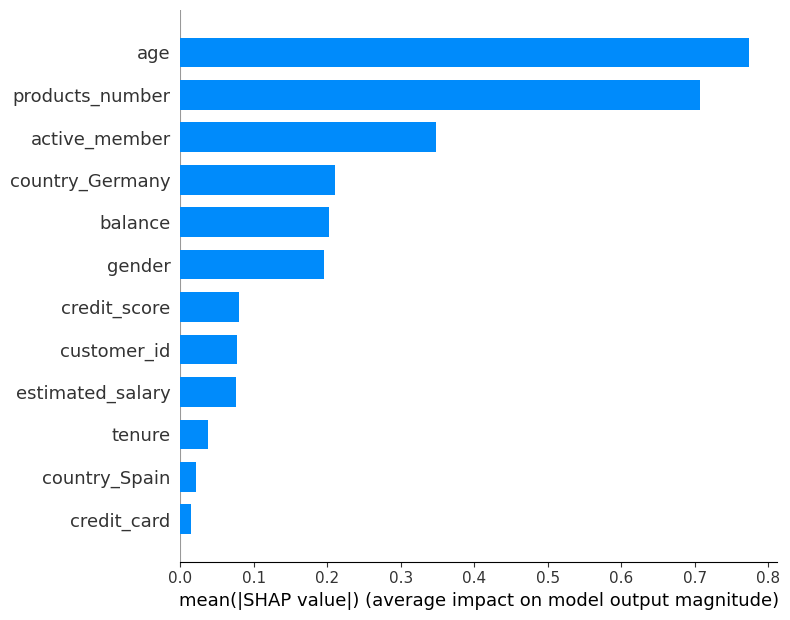

In [35]:
shap.summary_plot(
    shap_values,
    X_test,
    plot_type="bar"
)

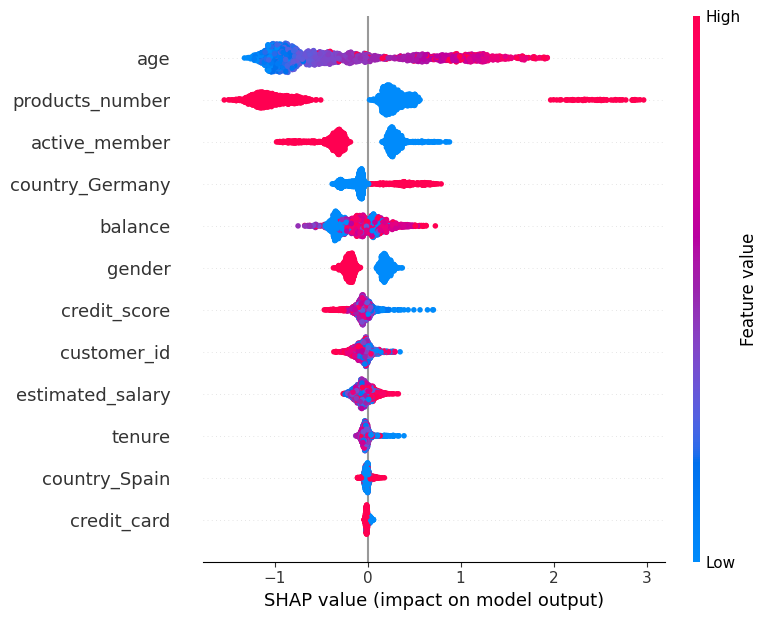

In [36]:
shap.summary_plot(
    shap_values,
    X_test
)

## Conclusion

This project demonstrates the application of an end-to-end machine learning pipeline for bank customer churn prediction.
An XGBoost classifier was used as the primary model, with class imbalance handled using `scale_pos_weight` and performance 
optimized through Optuna-based hyperparameter tuning.

The optimized model achieved a ROC-AUC score of approximately 0.87, indicating strong discriminative capability between churn 
and non-churn customers. Compared to the baseline model, the tuned model improved recall for churn customers, which is critical 
in churn prediction scenarios where false negatives are more costly than false positives.

Threshold tuning further enhanced the model’s practical usability by allowing control over the precision–recall trade-off. 
SHAP analysis provided interpretable insights, revealing that customer age, number of products, active membership status, 
and account balance are key drivers of churn behavior.

Overall, the results show that combining robust modeling, threshold optimization, and explainability leads to a more effective 
and business-relevant churn prediction system.
